In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#para propresar los datos
import category_encoders as ce #(para pasar los datos categoricos a númericos)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#para reducción de dimensionalidad
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
#para regresión logistica
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


#felicidad

In [4]:
df_heart = pd.read_csv('heart.csv')
print(df_heart.shape)
df_heart.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data de Heart

In [5]:
#preparamos la data a utilizar
df_heart_features = df_heart.drop(['target'], axis=1)
df_heart_target = df_heart['target']
#escalamos los datos
df_heart_features_escaled = StandardScaler().fit_transform(df_heart_features)
#separamos nuestros datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(df_heart_features_escaled,df_heart_target,test_size=0.2, random_state=42)

PCA y IPCA

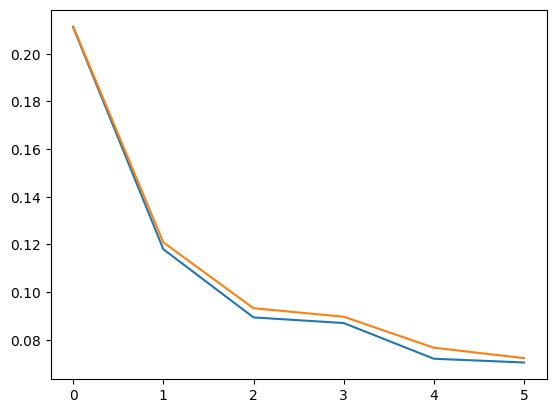

In [6]:
#si n es un número entre 0 y 1 entonces tomará los features necesarios para explicar el n*100% de los datos
#si n es un número entero estos representan la cantidad de features que utilizaremos
#con PCA
pca = PCA(n_components=0.6)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
#con IPCA
ipca = IncrementalPCA(n_components=6, batch_size=10)
ipca.fit(x_train)
x_train_ipca = ipca.transform(x_train)
x_test_ipca = ipca.transform(x_test)
#visualizamos nuestros cuanta información aportan nuestras componentes principales 
plt.plot(range(len(ipca.explained_variance_)), ipca.explained_variance_ratio_)
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()


Utilizamos la reg log

In [7]:
reg_log = LogisticRegression()

para PCA

In [8]:
reg_log.fit(x_train_pca,y_train)

LogisticRegression()

In [9]:
y_test_pred_pca = reg_log.predict(x_test_pca)
print(metrics.accuracy_score(y_test, y_test_pred_pca))

0.7902439024390244


para IPCA

In [10]:
reg_log.fit(x_train_ipca,y_train)

LogisticRegression()

In [11]:
y_test_pred_ipca = reg_log.predict(x_test_ipca)
print(metrics.accuracy_score(y_test, y_test_pred_ipca))

0.7902439024390244


KERNELS Y KPCA

In [12]:
#se utiliza cuando no podemos representar nuestros datos de forma lineal y recurrimos a kernels(funcoones) para poder categorizaro predecir de manera optima
#pueden ser lineales, polinomeales o gauseanos

In [13]:
kpca = KernelPCA(n_components=6, kernel='poly') #también tiene el parametro kernel= 'linear', 'poly', 'rbf'
kpca.fit(x_train)

KernelPCA(kernel='poly', n_components=6)

In [14]:
x_train_kpca = kpca.transform(x_train)
x_test_kpca = kpca.transform(x_test)

In [15]:
reg_log.fit(x_train_kpca,y_train)

LogisticRegression()

In [16]:
y_test_pred_kpca = reg_log.predict(x_test_kpca)
print(metrics.accuracy_score(y_test, y_test_pred_kpca))

0.7951219512195122
